In [1]:

import os
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib.ticker import FuncFormatter

caminho_pasta_grupo = '/content/drive/MyDrive/A3 - Inteligência Artificial/Arquivos Notebook'

os.makedirs(caminho_pasta_grupo, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dados Carregados. Período: 2020-11-01 00:00:00 a 2025-08-01 00:00:00

--- 1. Estatísticas Descritivas ---
                  count       mean        std        min        25%  \
taxa_selic        58.00       0.04       0.01       0.01       0.04   
indice_ipca       58.00       0.54       1.22      -4.35       0.13   
quantidadeTED     58.00   84537.90   25744.25   61294.83   68698.66   
valorTED          58.00 3368200.88  387935.67 2381021.03 3089695.68   
quantidadeBoleto  58.00  346535.88   15107.26  306432.32  338333.67   
valorBoleto       58.00  469483.94   55335.05  338584.62  428351.20   
quantidadeCheque  58.00   13749.79    3896.01    7764.15   10244.97   
valorCheque       58.00   45704.07    7471.97   33019.98   39306.63   
valorPix          58.00 1408539.22  864247.73   29196.99  662077.88   
quantidadePix     58.00 3264461.77 2104582.86   32867

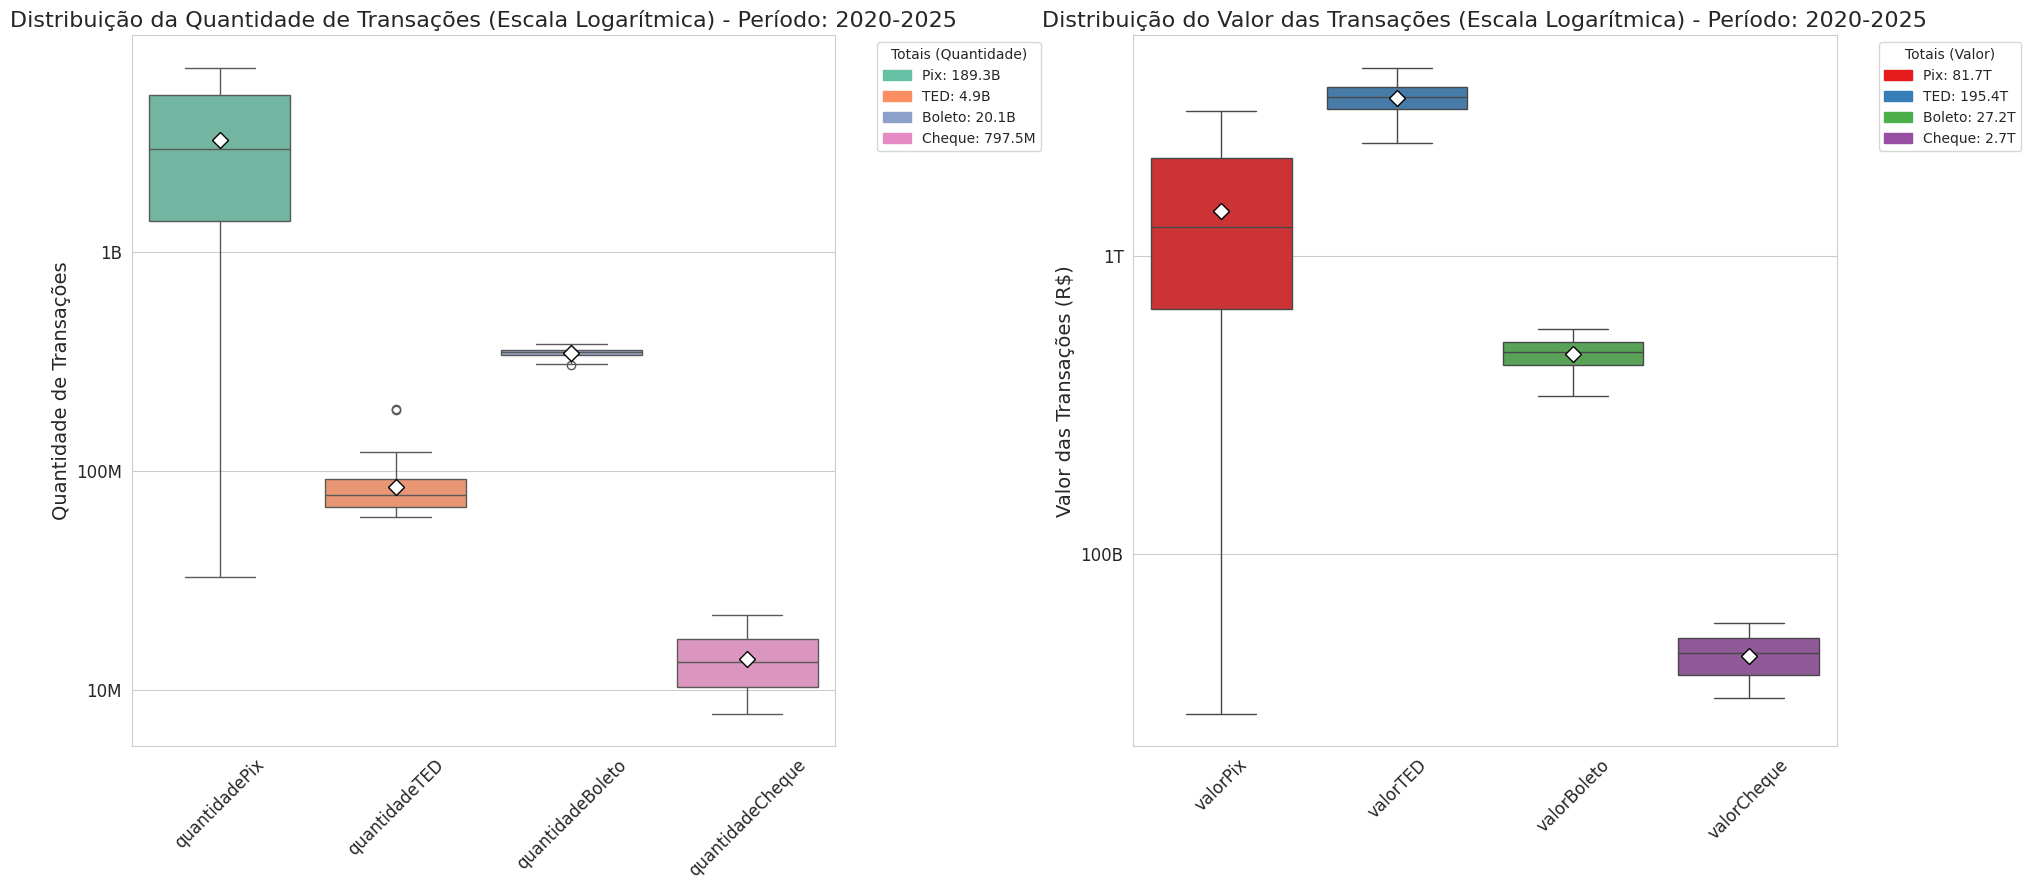


--- 3. Gerando Gráfico de Evolução Pix ---


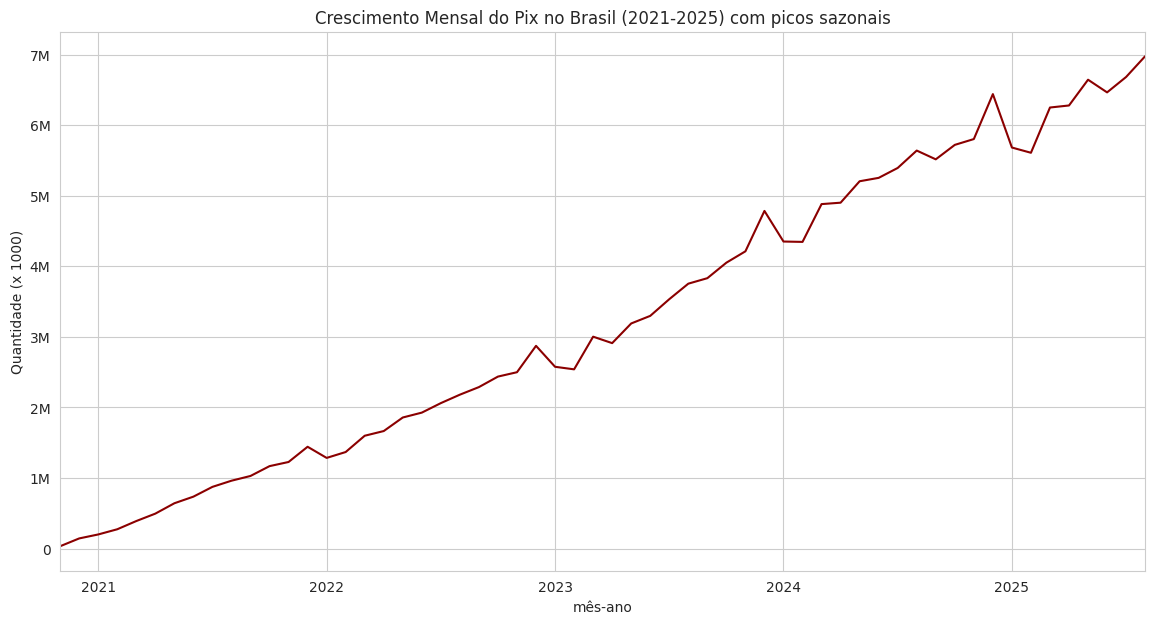


--- 4. Decomposição da Série ---


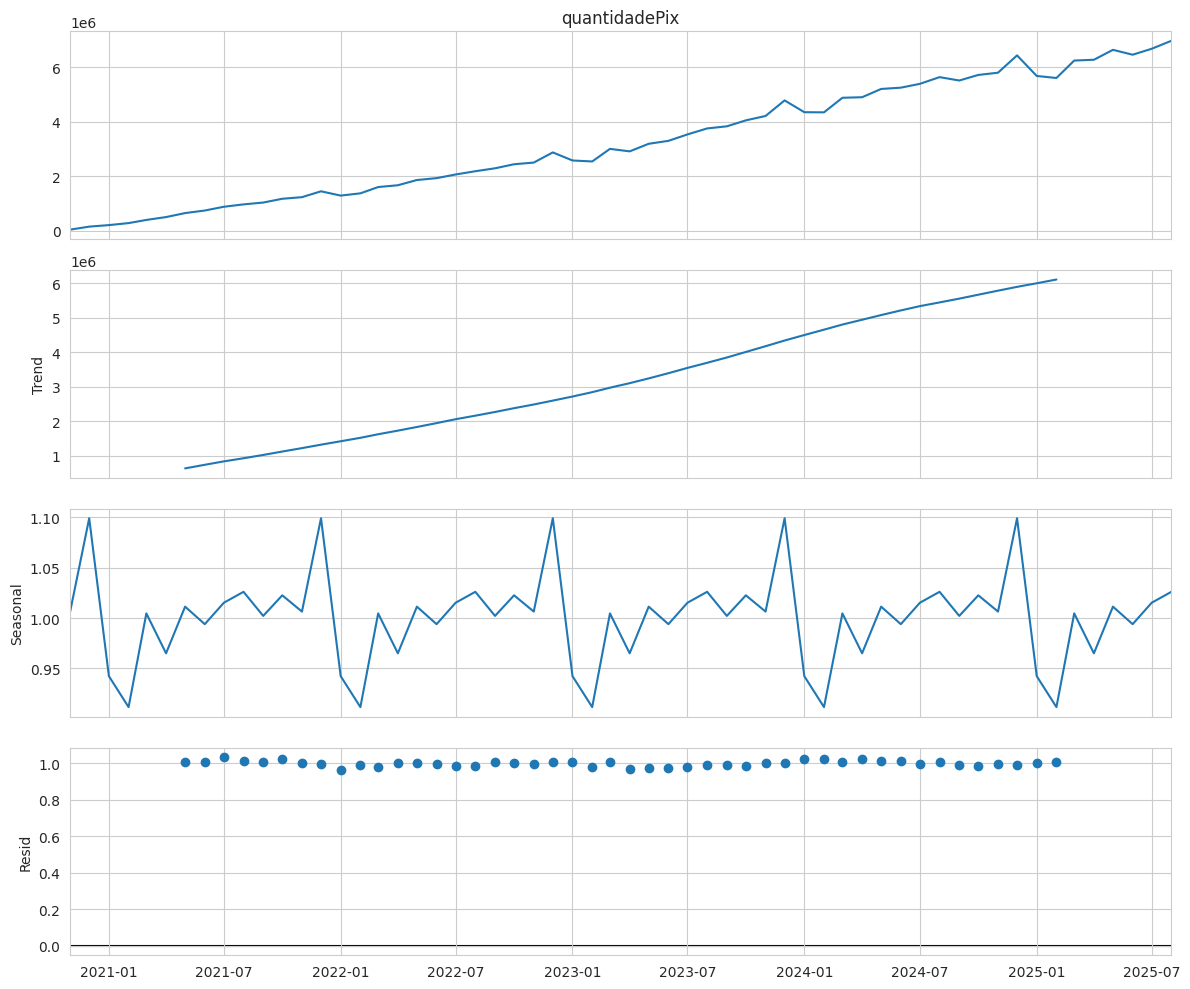


--- 5. Análise de Correlação ---


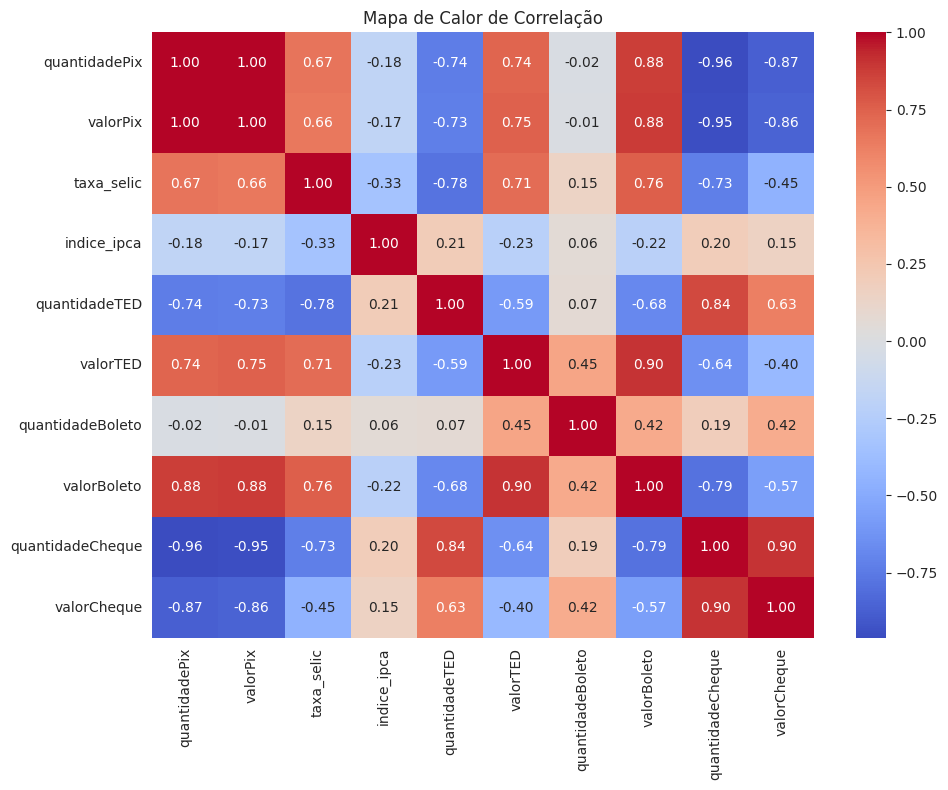


--- 6. Teste de Estacionariedade (ADF) ---
Teste para quantidadePix:
Estatística ADF: 2.1974
P-value: 0.9989
❌ P-value > 0.05: Série NÃO É ESTACIONÁRIA (Requer Diferenciação).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import os
from google.colab import drive
import matplotlib.dates as mdates

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 100
pd.options.display.float_format = '{:.2f}'.format

drive.mount('/content/drive')

caminho_pasta_grupo = '/content/drive/MyDrive/A3 - Inteligência Artificial/Arquivos Notebook'
caminho_arquivo = f'{caminho_pasta_grupo}/COMPORTAMENTO_PIX-2020-2025[atualizada].csv'

df = pd.read_csv(caminho_arquivo, index_col=0, parse_dates=True, date_format="%b-%y")
df.index.freq = 'MS'

print("✅ Dados Carregados. Período: {} a {}".format(df.index.min(), df.index.max()))

print("\n--- 1. Estatísticas Descritivas ---")
estatisticas = df.describe().T
estatisticas.to_csv(f'{caminho_pasta_grupo}/estatisticas_descritivas.csv')
print(estatisticas)

print("\n--- 2. Gerando Boxplots ---")

def formatar_milhoes(valor, pos):
    if valor >= 1_000_000_000:
        return f'{valor/1_000_000_000:.0f}B'
    elif valor >= 1_000_000:
        return f'{valor/1_000_000:.0f}M'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f}K'
    return f'{valor:.0f}'

def formatar_milhoes_quantidades_boxplot(valor, pos):
    valor_ajustado = valor * 1000
    if valor_ajustado >= 1_000_000_000:
        return f'{valor_ajustado/1_000_000_000:.0f}B'
    elif valor_ajustado >= 1_000_000:
        return f'{valor_ajustado/1_000_000:.0f}M'
    elif valor_ajustado >= 1_000:
        return f'{valor_ajustado/1_000:.0f}K'
    return f'{valor_ajustado:.0f}'

def formatar_milhoes_valores_boxplot(valor, pos):
    valor_ajustado = valor * 1_000_000
    if valor_ajustado >= 1_000_000_000_000:
        return f'{valor_ajustado/1_000_000_000_000:.0f}T'
    elif valor_ajustado >= 1_000_000_000:
        return f'{valor_ajustado/1_000_000_000:.0f}B'
    elif valor_ajustado >= 1_000_000:
        return f'{valor_ajustado/1_000_000:.0f}M'
    elif valor_ajustado >= 1_000:
        return f'{valor_ajustado/1_000:.0f}K'
    return f'{valor_ajustado:.0f}'

def formatar_milhoes_e_milhares(valor, pos):
    if valor >= 1_000_000_000_000:
        return f'{valor/1_000_000_000_000:.1f}T'
    elif valor >= 1_000_000_000:
        return f'{valor/1_000_000_000:.1f}B'
    elif valor >= 1_000_000:
        return f'{valor/1_000_000:.1f}M'
    elif valor >= 1_000:
        return f'{valor/1_000:.1f}K'
    return f'{valor:.0f}'

fig_boxplot, axes_boxplot = plt.subplots(1, 2, figsize=(20, 9))

sns.boxplot(data=df[['quantidadePix', 'quantidadeTED','quantidadeBoleto','quantidadeCheque']], palette='Set2', ax=axes_boxplot[0], showmeans=True, meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
axes_boxplot[0].set_title('Distribuição da Quantidade de Transações (Escala Logarítmica) - Período: 2020-2025', fontsize=16)
axes_boxplot[0].set_ylabel('Quantidade de Transações', fontsize=14)
axes_boxplot[0].tick_params(axis='x', rotation=45, labelsize=12)
axes_boxplot[0].tick_params(axis='y', labelsize=12)
axes_boxplot[0].set_yscale('log')
axes_boxplot[0].yaxis.set_major_formatter(FuncFormatter(formatar_milhoes_quantidades_boxplot))

colunas_quantidade = ['quantidadePix', 'quantidadeTED', 'quantidadeBoleto', 'quantidadeCheque']
palette_quantidades = sns.color_palette('Set2')
legend_handles_q = []
for i, col_name in enumerate(colunas_quantidade):
    total_val = df[col_name].sum()
    scaled_total_for_formatter = total_val * 1000
    formatted_total = formatar_milhoes_e_milhares(scaled_total_for_formatter, None)
    transaction_type = col_name.replace('quantidade', '')
    legend_handles_q.append(mpatches.Patch(color=palette_quantidades[i], label=f'{transaction_type}: {formatted_total}'))
axes_boxplot[0].legend(handles=legend_handles_q, bbox_to_anchor=(1.05, 1), loc='upper left', title='Totais (Quantidade)')

sns.boxplot(data=df[['valorPix', 'valorTED','valorBoleto','valorCheque']], palette='Set1', ax=axes_boxplot[1], showmeans=True, meanprops={"marker":"D","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
axes_boxplot[1].set_title('Distribuição do Valor das Transações (Escala Logarítmica) - Período: 2020-2025', fontsize=16)
axes_boxplot[1].set_ylabel('Valor das Transações (R$)', fontsize=14)
axes_boxplot[1].tick_params(axis='x', rotation=45, labelsize=12)
axes_boxplot[1].tick_params(axis='y', labelsize=12)
axes_boxplot[1].set_yscale('log')
axes_boxplot[1].yaxis.set_major_formatter(FuncFormatter(formatar_milhoes_valores_boxplot))

colunas_valor = ['valorPix', 'valorTED', 'valorBoleto', 'valorCheque']
palette_valores = sns.color_palette('Set1')
legend_handles_v = []
for i, col_name in enumerate(colunas_valor):
    total_val = df[col_name].sum()
    scaled_total_for_formatter = total_val * 1_000_000
    formatted_total = formatar_milhoes_e_milhares(scaled_total_for_formatter, None)
    transaction_type = col_name.replace('valor', '')
    legend_handles_v.append(mpatches.Patch(color=palette_valores[i], label=f'{transaction_type}: {formatted_total}'))
axes_boxplot[1].legend(handles=legend_handles_v, bbox_to_anchor=(1.05, 1), loc='upper left', title='Totais (Valor)')


plt.tight_layout()
plt.savefig(f'{caminho_pasta_grupo}/grafico_boxplots_com_medias.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- 3. Gerando Gráfico de Evolução Pix ---")
fig, ax = plt.subplots(figsize=(14, 7))
df['quantidadePix'].plot(title='Crescimento Mensal do Pix no Brasil (2021-2025) com picos sazonais', color='darkred', ax=ax)
ax.yaxis.set_major_formatter(FuncFormatter(formatar_milhoes))
ax.set_ylabel("Quantidade (x 1000)")
ax.grid(True)
plt.savefig(f'{caminho_pasta_grupo}/grafico_evolucao_pix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- 4. Decomposição da Série ---")
decomposicao = seasonal_decompose(df['quantidadePix'], model='multiplicative', period=12)

fig = decomposicao.plot()
fig.set_size_inches(12, 10)
plt.tight_layout()
plt.savefig(f'{caminho_pasta_grupo}/grafico_decomposicao.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- 6. Teste de Estacionariedade (ADF) ---")

def teste_adfuller(serie):
    resultado = adfuller(serie.dropna())
    print(f'Estatística ADF: {resultado[0]:.4f}')
    print(f'P-value: {resultado[1]:.4f}')

    if resultado[1] <= 0.05:
        print("✅ P-value <= 0.05: Série é ESTACIONÁRIA.")
    else:
        print("❌ P-value > 0.05: Série NÃO É ESTACIONÁRIA (Requer Diferenciação).")

print("Teste para quantidadePix:")
teste_adfuller(df['quantidadePix'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- 8. Quantidade Total Movimentada por Meio de Pagamento ---


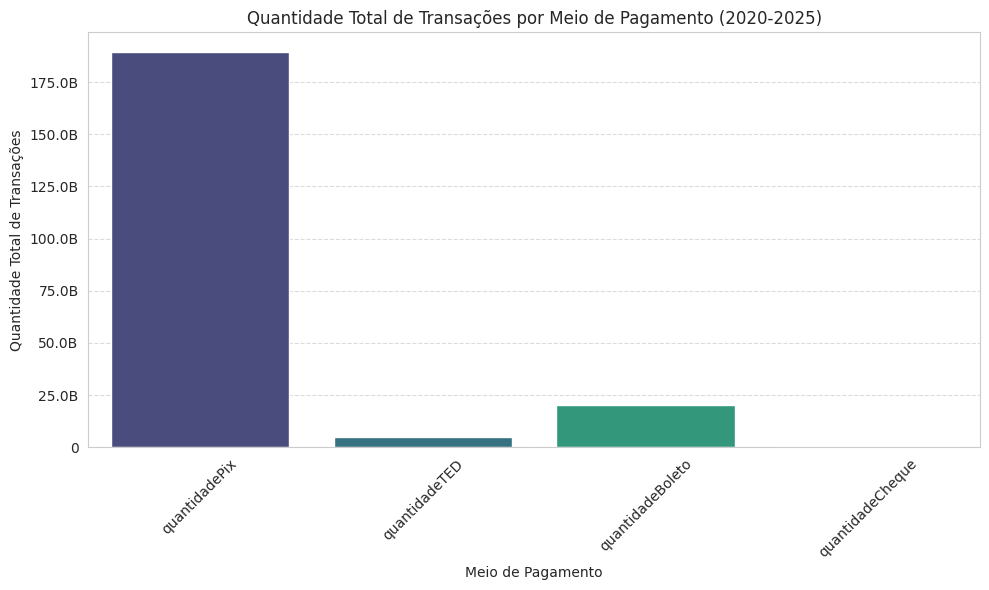

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import os
from google.colab import drive

drive.mount('/content/drive')

caminho_pasta_grupo = '/content/drive/MyDrive/A3 - Inteligência Artificial/Arquivos Notebook'

caminho_arquivo = f'{caminho_pasta_grupo}/COMPORTAMENTO_PIX-2020-2025[atualizada].csv'

df = pd.read_csv(caminho_arquivo, index_col=0, parse_dates=True, date_format="%b-%y")
df.index.freq = 'MS'

print("\n--- 8. Quantidade Total Movimentada por Meio de Pagamento ---")

colunas_quantidade = ['quantidadePix', 'quantidadeTED', 'quantidadeBoleto', 'quantidadeCheque']

df_scaled_quantidades = df[colunas_quantidade] * 1000

soma_quantidades = df_scaled_quantidades.sum()

df_soma_quantidades = pd.DataFrame(soma_quantidades, columns=['Total'])
df_soma_quantidades.index.name = 'Meio de Pagamento'

def formatar_milhoes_e_milhares(valor, pos):
    if valor >= 1_000_000_000:
        return f'{valor/1_000_000_000:.1f}B'
    elif valor >= 1_000_000:
        return f'{valor/1_000_000:.1f}M'
    elif valor >= 1_000:
        return f'{valor/1_000:.1f}K'
    return f'{valor:.0f}'

plt.figure(figsize=(10, 6))
sns.barplot(x=df_soma_quantidades.index, y='Total', hue=df_soma_quantidades.index, data=df_soma_quantidades, palette='viridis', legend=False)
plt.title('Quantidade Total de Transações por Meio de Pagamento (2020-2025)')
plt.xlabel('Meio de Pagamento')
plt.ylabel('Quantidade Total de Transações')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') b
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhoes_e_milhares))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{caminho_pasta_grupo}/grafico_quantidade_total_por_meio.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print(f"O valor máximo de `valorPix` movimentado em um único mês é: R$ {df['valorPix'].max():,.2f}")

O valor máximo de `valorPix` movimentado em um único mês é: R$ 3,058,009.49


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- 7. Mapa de Calor de Correlação com Filtro de Tendência (Diferenciação) ---


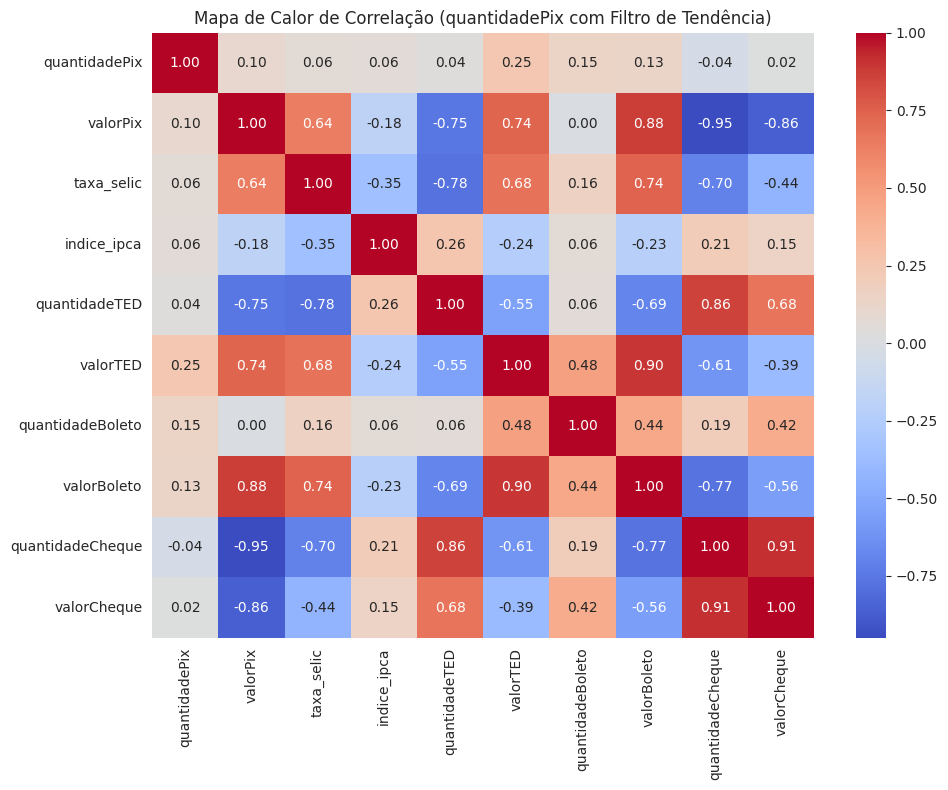

In [6]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

caminho_pasta_grupo = '/content/drive/MyDrive/A3 - Inteligência Artificial/Arquivos Notebook'

caminho_arquivo = f'{caminho_pasta_grupo}/COMPORTAMENTO_PIX-2020-2025[atualizada].csv'

df = pd.read_csv(caminho_arquivo, index_col=0, parse_dates=True, date_format="%b-%y")
df.index.freq = 'MS'

print("\n--- 7. Mapa de Calor de Correlação com Filtro de Tendência (Diferenciação) ---")

df_correlacao_filtrada = df[['quantidadePix', 'valorPix', 'taxa_selic', 'indice_ipca',
                                 'quantidadeTED', 'valorTED', 'quantidadeBoleto', 'valorBoleto',
                                 'quantidadeCheque', 'valorCheque']].copy()

df_correlacao_filtrada['quantidadePix'] = df_correlacao_filtrada['quantidadePix'].diff()

df_correlacao_filtrada.dropna(inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df_correlacao_filtrada.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlação (quantidadePix com Filtro de Tendência)')
plt.tight_layout()
plt.savefig(f'{caminho_pasta_grupo}/grafico_correlacao_com_filtro_tendencia.png', dpi=300, bbox_inches='tight')
plt.show()
